In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [3]:
data = pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")

In [4]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
data.isna().sum() / data.shape[0]

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [7]:
data.duplicated().any()

False

In [8]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
data.describe(include = object)

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


## Univariate Analysis & Visualizations

In [10]:
def count_plot(column_name, hue = None, rotation = 0):
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    plt.xticks(rotation = rotation)
    plt.show()

In [11]:


def pie_plot(column_name):
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [12]:
def box_plot(x_axis = None, y_axis = None):
    sns.boxplot(x = x_axis, y = y_axis, data = data)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

### Discovering `Rent` column

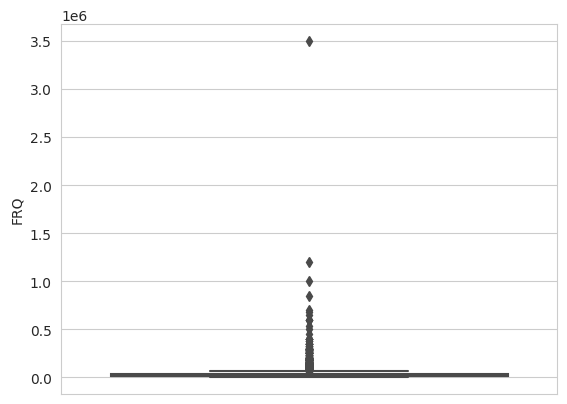

In [13]:
box_plot(y_axis = "Rent")

In [14]:
data = data[data['Rent'] <= 2000000]

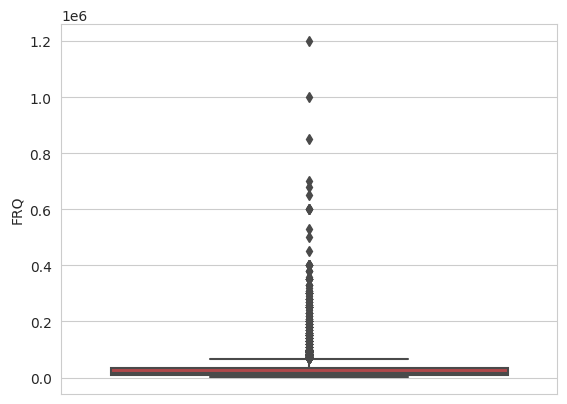

In [15]:
box_plot(y_axis = "Rent")

### Discovering `Posted On` column

In [16]:
data["Posted On"].unique()

array(['2022-05-18', '2022-05-13', '2022-05-16', '2022-07-04',
       '2022-05-09', '2022-04-29', '2022-06-21', '2022-06-07',
       '2022-06-20', '2022-05-23', '2022-05-14', '2022-05-05',
       '2022-06-01', '2022-05-17', '2022-06-09', '2022-07-02',
       '2022-06-14', '2022-06-15', '2022-05-28', '2022-05-22',
       '2022-06-18', '2022-06-25', '2022-06-22', '2022-05-21',
       '2022-06-26', '2022-06-16', '2022-06-29', '2022-05-10',
       '2022-05-12', '2022-06-03', '2022-05-31', '2022-06-10',
       '2022-06-24', '2022-04-30', '2022-05-27', '2022-06-06',
       '2022-05-20', '2022-05-26', '2022-07-03', '2022-04-23',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-05-30',
       '2022-06-08', '2022-05-03', '2022-05-07', '2022-06-27',
       '2022-05-15', '2022-04-28', '2022-06-28', '2022-06-23',
       '2022-06-13', '2022-05-04', '2022-04-25', '2022-05-06',
       '2022-06-30', '2022-07-01', '2022-06-17', '2022-06-11',
       '2022-05-11', '2022-06-12', '2022-06-05', '2022-

In [17]:
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [18]:
data["Year"] = data["Posted On"].dt.year
data["Month"] = data['Posted On'].dt.month

In [19]:
def find_seasons(month_number):
    if month_number in [12,1,2]:
        return 1 
    elif month_number in [3,4,5]:
        return 2 
    elif month_number in [6,7,8]:
        return 3 
    elif month_number in [9,10,11]:
        return 4 

In [20]:
data['Season'] = data['Month'].apply(find_seasons)

In [21]:
data.drop(columns = "Posted On", inplace = True)

In [22]:
data.sample(3)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Season
2977,2,10000,60,3 out of 4,Super Area,Bindapur,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,2
4466,2,12000,1100,5 out of 6,Super Area,Serilingampally,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,2
2143,1,7500,500,1 out of 4,Super Area,Mahadevapura,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,2


In [23]:
data['Year'].unique()

array([2022], dtype=int32)

In [24]:
data["Month"].unique()

array([5, 7, 4, 6], dtype=int32)

In [25]:
data["Season"].unique()

array([2, 3])

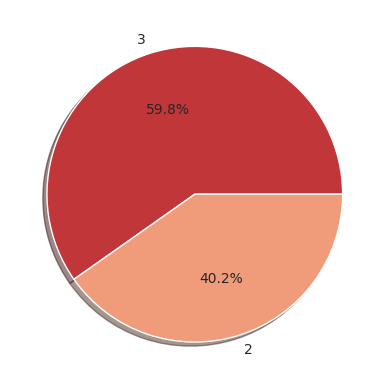

In [26]:
pie_plot("Season")

### Discovering `BHK` column

In [27]:
data["BHK"].unique()

array([2, 1, 3, 6, 4, 5])

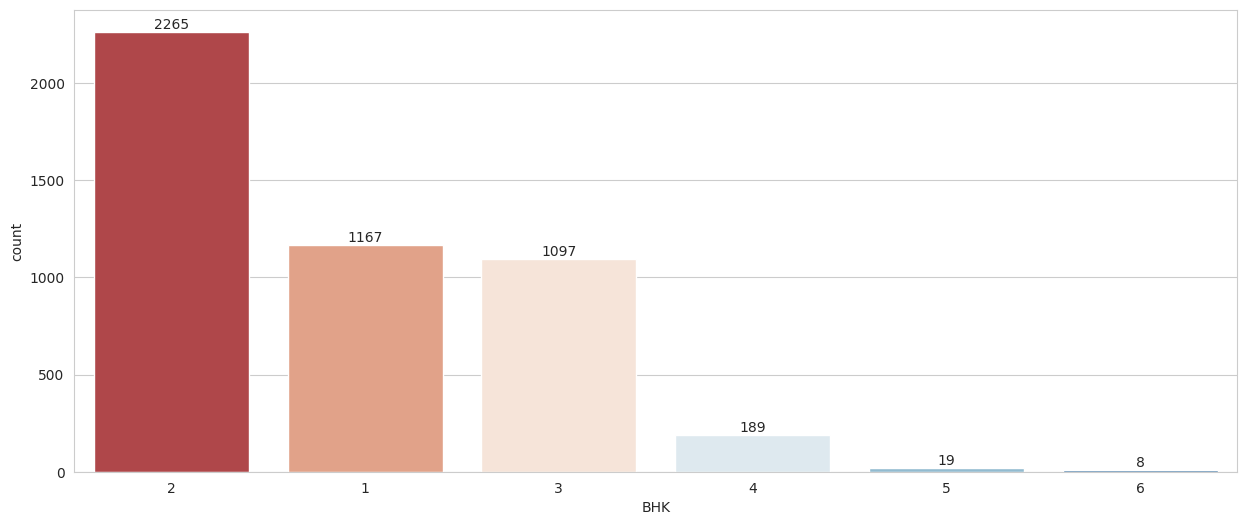

In [28]:

plt.figure(figsize = (15,6))
count_plot(column_name = "BHK") 

### Discovering `Size` column

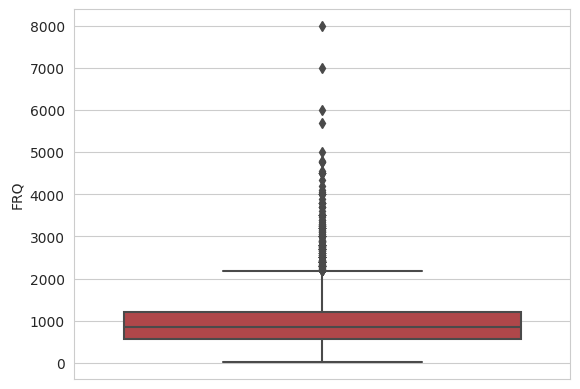

In [29]:
box_plot(y_axis = "Size")

### Discovering `Floor` column

In [30]:
data['Floor'].unique()[:50]

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24'], dtype=object)

In [31]:
def finde_level(sentence):
    sentence = sentence.split(" ")
    try:
        return " ".join(sentence[:2]) if sentence[1] == "Basement" else sentence[0]
    except:
        return sentence[0]

In [32]:
def finde_levels_number(sentence):
    sentence = sentence.split(" ")
    return sentence[-1]  if len(sentence) > 1 else "1"

In [33]:
data["Level"] = data["Floor"].apply(finde_level)

In [34]:
data["Floors numbers"] = data['Floor'].apply(finde_levels_number)

In [35]:
data.drop(columns = 'Floor', inplace = True)

In [36]:
data.sample(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Season,Level,Floors numbers
3349,3,33000,1600,Carpet Area,Iyyappanthangal,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,7,3,15,16
4466,2,12000,1100,Super Area,Serilingampally,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,2,5,6
1016,2,44000,710,Carpet Area,"Ajmera Bhakti Park, Bhakti Park",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Agent,2022,7,3,13,18


In [37]:
data['Level'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [38]:
data['Level'].replace({"Ground": 0, "Lower Basement": 0, "Upper Basement": 0},inplace = True)

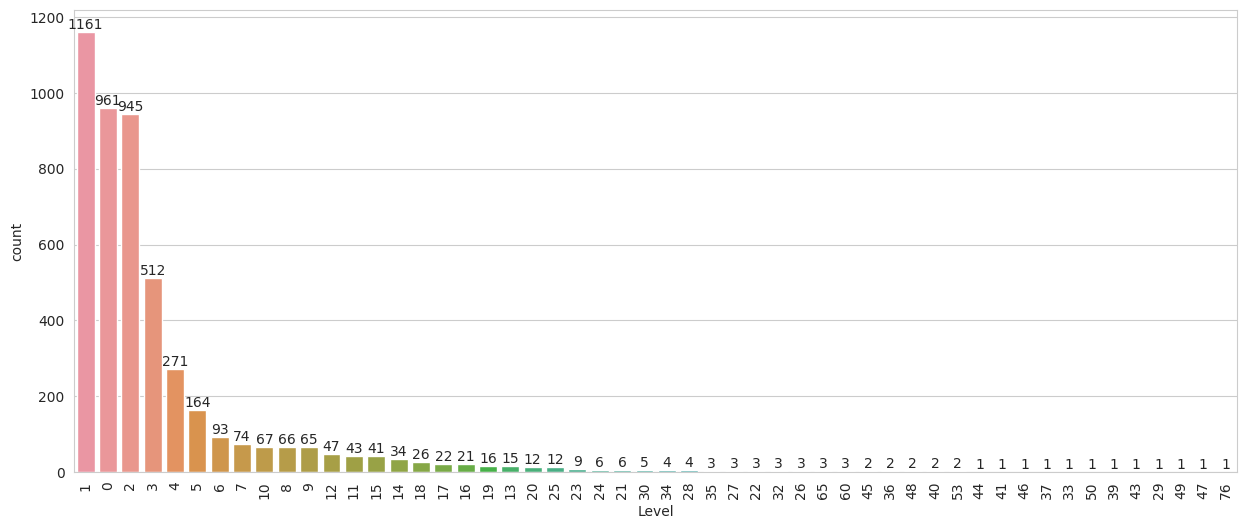

In [39]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Level", rotation = 90)

### Discovering `Area Type` column

In [40]:
data["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

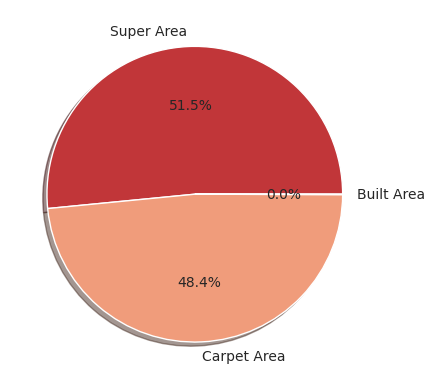

In [41]:
pie_plot("Area Type")

### Discovering  `City` column

In [42]:
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

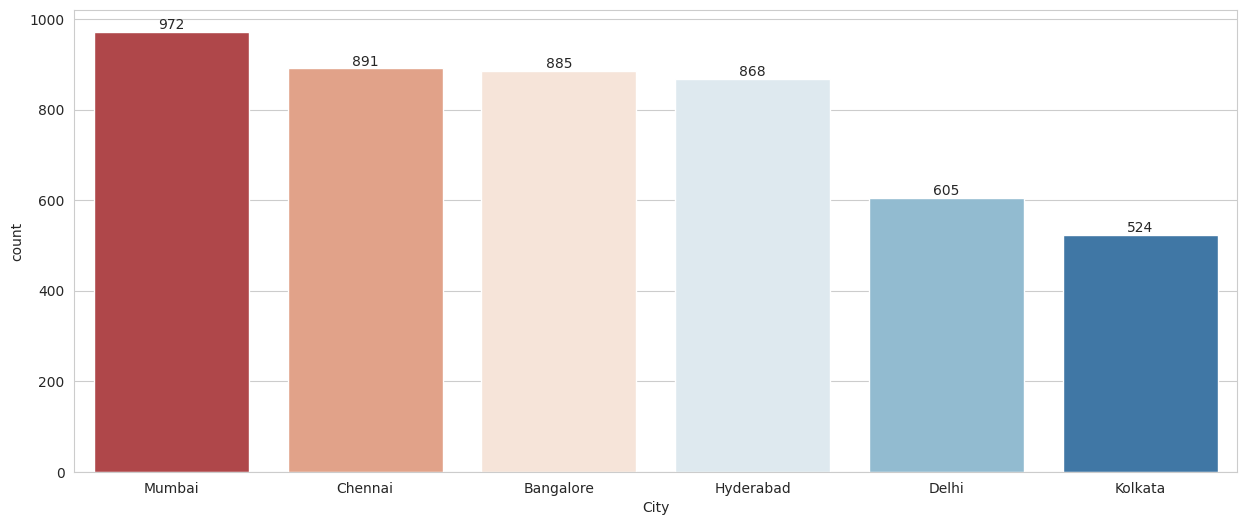

In [43]:
plt.figure(figsize = (15,6))
count_plot(column_name = "City")

### Discovering `Furnishing Status` column

In [44]:
data["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

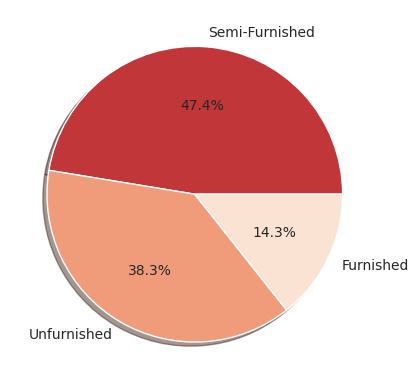

In [45]:
pie_plot('Furnishing Status')

### Discovering `Tenant Preferred` column

In [46]:
data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

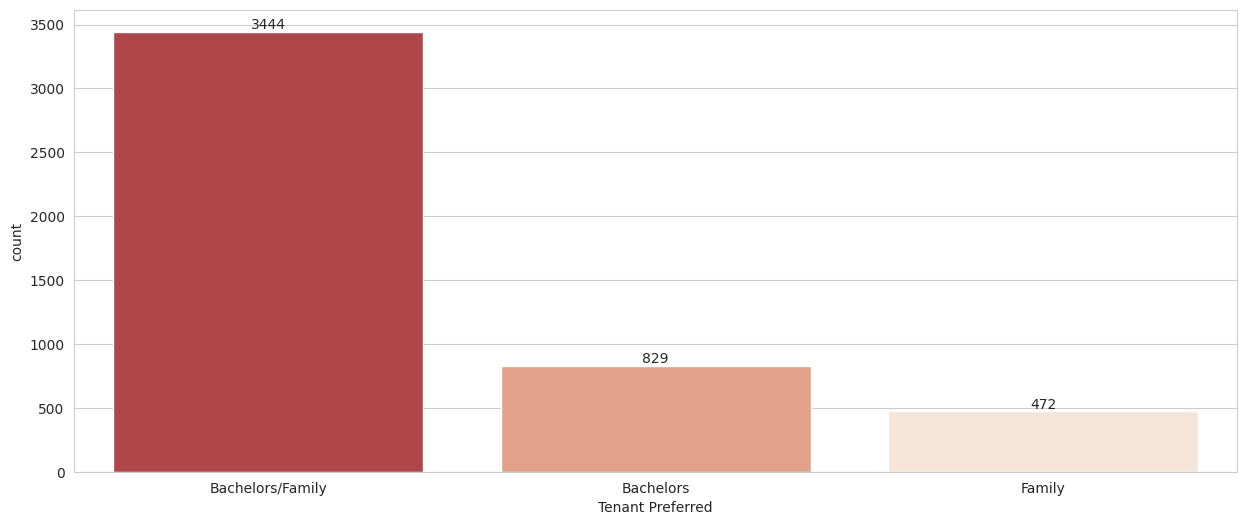

In [47]:
plt.figure(figsize = (15, 6))
count_plot(column_name = "Tenant Preferred")

### Discovering `Bathroom ` column

In [48]:
data["Bathroom"].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10])

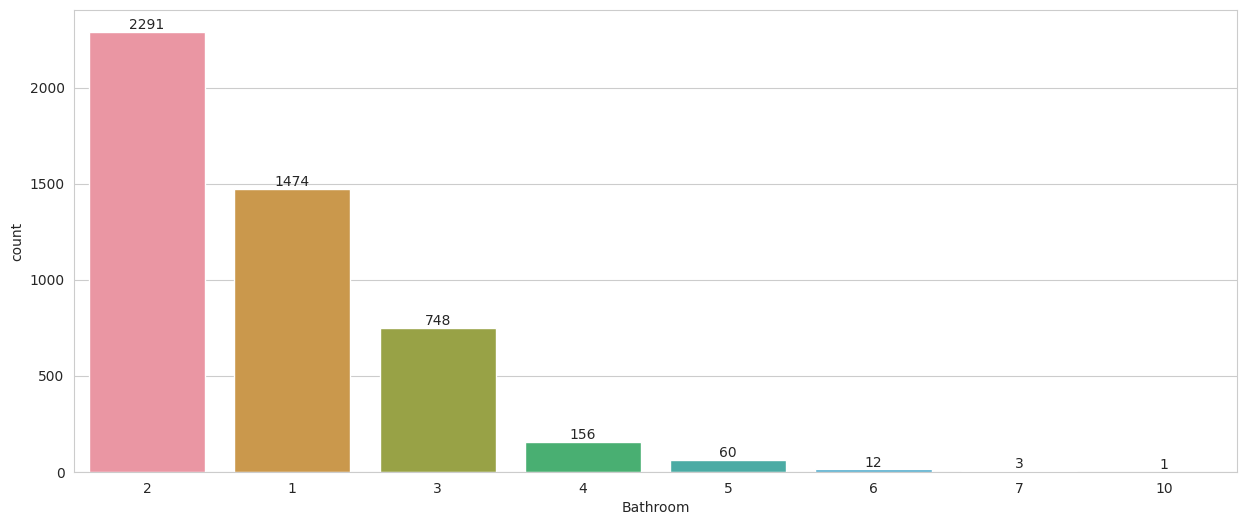

In [49]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Bathroom")

### Discovering `Point of Contact` column

In [50]:
data["Point of Contact"].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

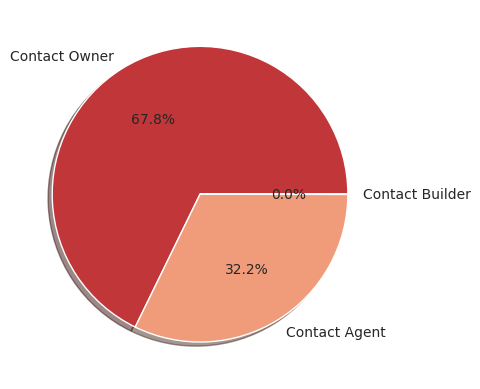

In [51]:
pie_plot("Point of Contact")

## Bivariate Analysis & Visualizations

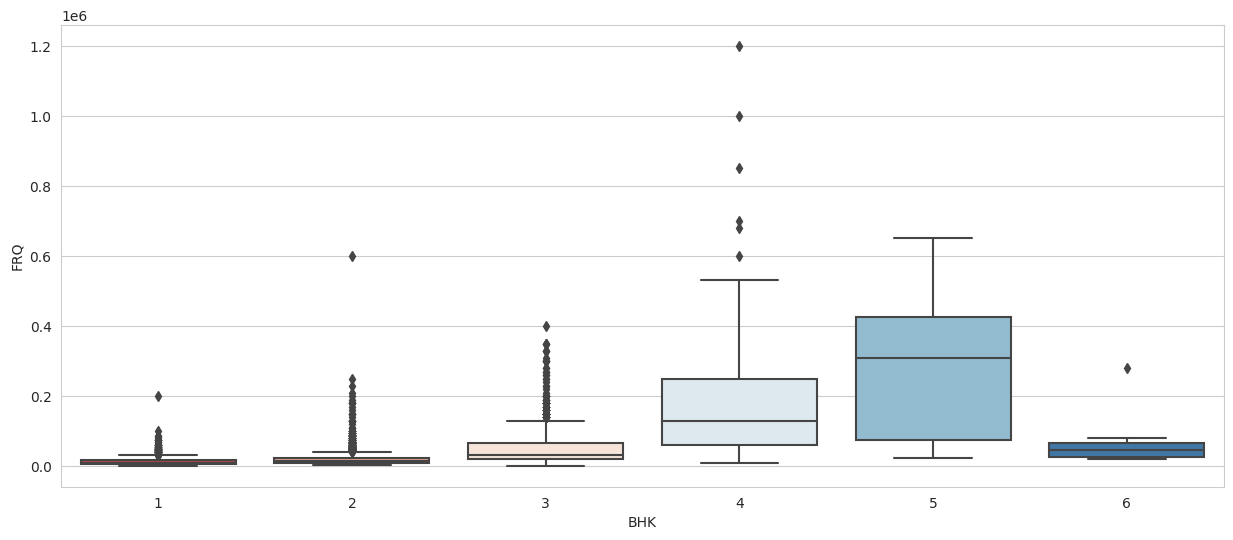

In [52]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "BHK", y_axis = "Rent")

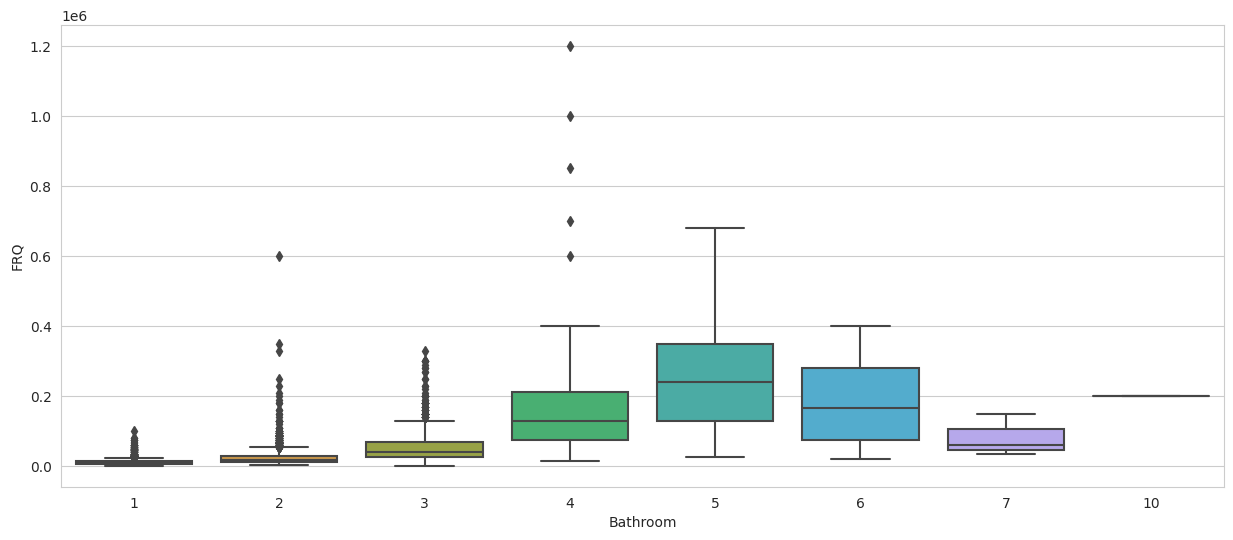

In [53]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "Bathroom", y_axis = "Rent")

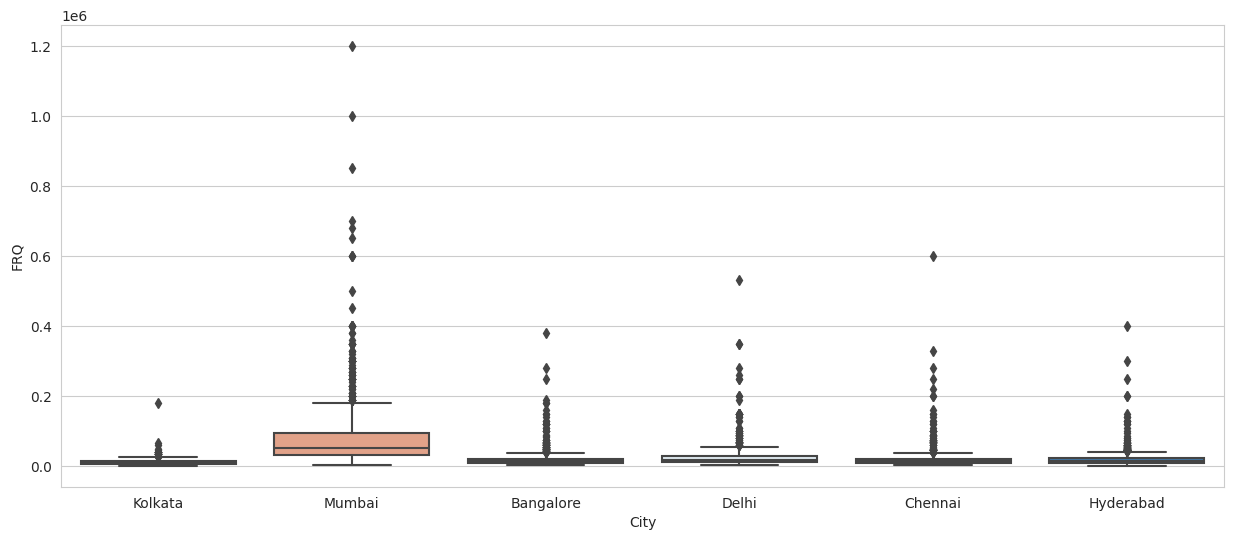

In [54]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "City", y_axis = "Rent")

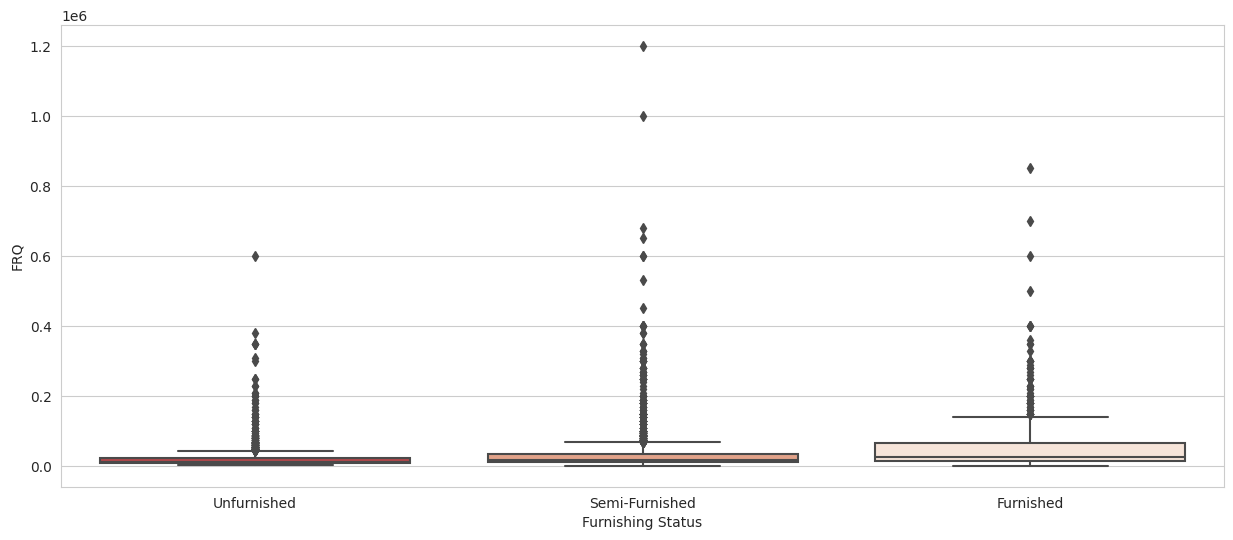

In [55]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "Furnishing Status", y_axis = "Rent")

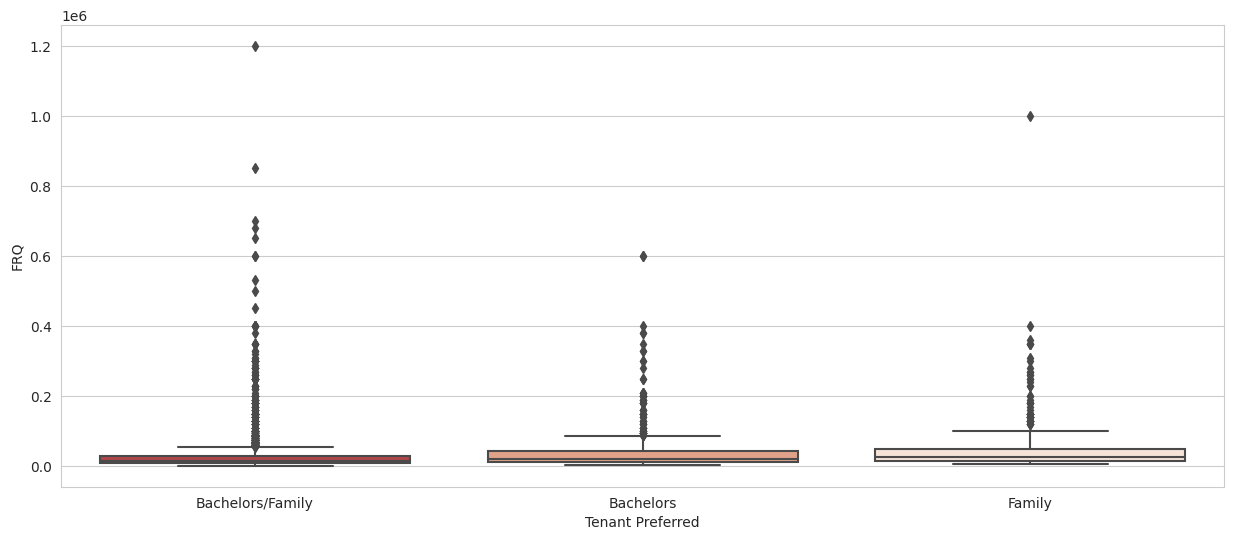

In [56]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "Tenant Preferred", y_axis = "Rent")

In [57]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Year', 'Month', 'Season', 'Level', 'Floors numbers'],
      dtype='object')

In [58]:
data["Level"] = data["Level"].astype(int)
data["Floors numbers"] = data["Floors numbers"].astype(int)

### Heatmap of Correlation

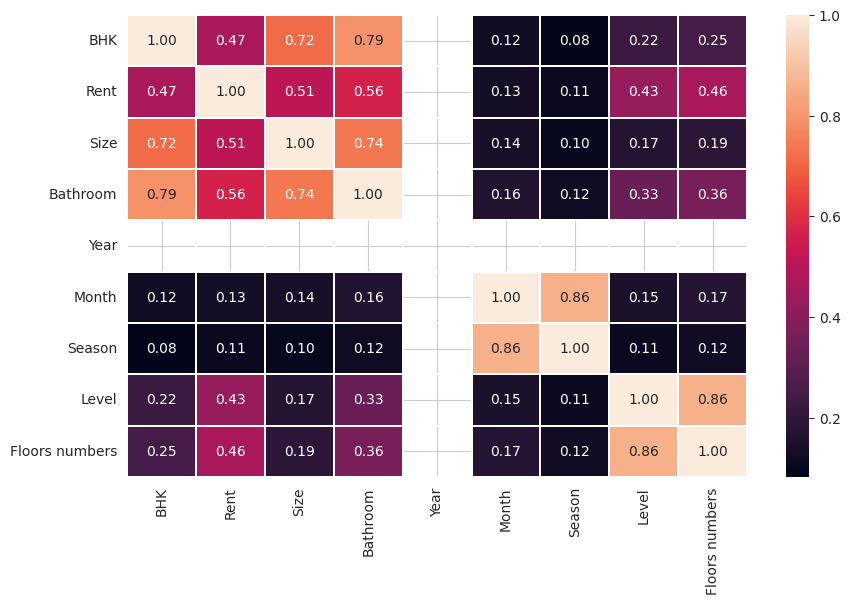

In [59]:
plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

In [60]:
data.drop(columns = ["Year", "Month", "Season", "Area Locality"], inplace = True)

In [61]:
data.sample(3)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Floors numbers
2594,1,4000,125,Super Area,Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
3739,2,19397,2000,Super Area,Chennai,Furnished,Bachelors/Family,2,Contact Owner,7,10
618,3,84500,1150,Carpet Area,Mumbai,Unfurnished,Family,3,Contact Agent,10,12


## Modeling

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [63]:
encoder = LabelEncoder()

In [64]:
for column in data.select_dtypes(include = object).columns.tolist():
    data[column] = encoder.fit_transform(data[column])

In [65]:
data.sample(3)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Floors numbers
2980,2,12000,500,1,2,1,1,2,0,1,4
1246,2,72000,660,1,5,1,1,2,0,12,22
2559,2,7500,450,2,2,2,1,1,2,0,2


In [66]:
data["Rent"] = np.log10(data["Rent"])

In [67]:
Target = data["Rent"]
training = data.drop(columns = ["Rent"])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(training, Target, test_size = 0.3, random_state = 42)

In [69]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3321, 10)
x_test shape:  (1424, 10)
y_train shape:  (3321,)
y_test shape:  (1424,)


In [70]:
model = RandomForestRegressor()

In [71]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
model.score(X_train, y_train)

0.9697994137600893

In [73]:
predict = model.predict(X_test)

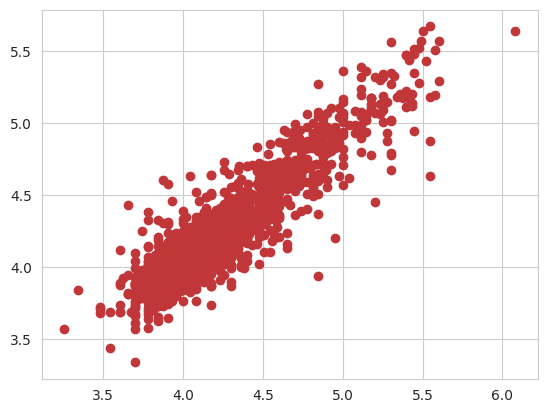

In [74]:
plt.scatter(y_test, predict)
plt.show()

In [75]:
r2_score(y_test,predict)

0.8235914275440872

In [76]:
mean_absolute_error(y_test,predict)

0.12814793544121164